In [114]:
# the subbort that had a major move will be considerred more reliable
# same for resistance

In [115]:
import pandas as pd
import numpy as np
# import yfinance

# from mplfinance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc

import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [116]:
# plt.rcParams['figure.figsize'] = [12, 7]

# plt.rc('font', size=14) 

In [117]:

name = 'BTC-USD'
# ticker = yfinance.Ticker(name)
# df = ticker.history(interval="90m")

# # df = ticker.history(interval="1d",start="2020-03-15",end="2020-07-15")

df=pd.read_csv("C:\\Users\Grant\Desktop\work_git\work\data\\4h\ZILUSDT_4h.csv")

# df = df.reset_index().set_index('Time') # SWITCH INDEX AND TIME COL

df = df.set_index('Time')

# df['Date'] = df['Time']
# pd.to_datetime(df['Time'])
# pd.to_datetime(df['Date'])
# df = df.set_index('Time')


In [118]:
df

,Open,High,Low,Close,Volume
Time,,,,,
2021-08-20 20:00:00,0.10771,0.11081,0.10699,0.10800,32355553.8
2021-08-21 00:00:00,0.10800,0.10980,0.10300,0.10843,33765670.2
2021-08-21 04:00:00,0.10853,0.11200,0.10574,0.11169,58438368.1
2021-08-21 08:00:00,0.11167,0.11280,0.10664,0.10835,78983740.6
2021-08-21 12:00:00,0.10839,0.11159,0.10824,0.10983,40760183.8
...,...,...,...,...,...
2022-02-02 12:00:00,0.04692,0.04711,0.04448,0.04494,37675224.6
2022-02-02 16:00:00,0.04491,0.04606,0.04417,0.04590,25445200.2
2022-02-02 20:00:00,0.04590,0.04597,0.04366,0.04405,28602166.0


In [119]:
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)

df = df.loc[:,['Date' ,'Open', 'High', 'Low', 'Close']]

In [120]:
df


,Date,Open,High,Low,Close
Time,,,,,
2021-08-20 20:00:00,18859.833333,0.10771,0.11081,0.10699,0.10800
2021-08-21 00:00:00,18860.000000,0.10800,0.10980,0.10300,0.10843
2021-08-21 04:00:00,18860.166667,0.10853,0.11200,0.10574,0.11169
2021-08-21 08:00:00,18860.333333,0.11167,0.11280,0.10664,0.10835
2021-08-21 12:00:00,18860.500000,0.10839,0.11159,0.10824,0.10983
...,...,...,...,...,...
2022-02-02 12:00:00,19025.500000,0.04692,0.04711,0.04448,0.04494
2022-02-02 16:00:00,19025.666667,0.04491,0.04606,0.04417,0.04590
2022-02-02 20:00:00,19025.833333,0.04590,0.04597,0.04366,0.04405


In [121]:
def isSupport(df,i):
  support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] \
  and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]

  return support

def isResistance(df,i):
  resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] \
  and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2] 

  return resistance

In [122]:
levels = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    levels.append((i,df['Low'][i]))
  elif isResistance(df,i):
    levels.append((i,df['High'][i]))

In [123]:
# MOCHLV = zip(df.Date, df.Open, df.Close, df.High, df.Low, df.Volume)


In [124]:
def plot_all():
  fig, ax = plt.subplots()

  candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)
  # candlestick_ohlc(ax,MOCHLV)

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()

  fig.tight_layout()

  for level in levels:
    plt.hlines(level[1],xmin=df['Date'][level[0]],\
               xmax=max(df['Date']),colors='blue')
  fig.show()

C:\Users\Grant\AppData\Local\Temp\ipykernel_7300\993476498.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


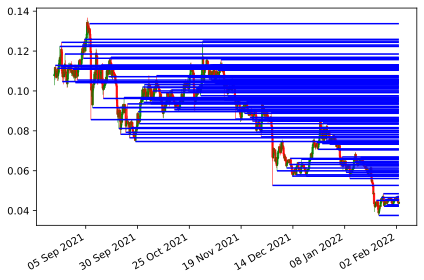

In [125]:
plot_all()

In [126]:
s =  np.mean(df['High'] - df['Low'])

In [127]:
def isFarFromLevel(l):
  return np.sum([abs(l-x) < s  for x in levels]) == 0

In [128]:
levels = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    l = df['Low'][i]

    if isFarFromLevel(l):
      levels.append((i,l))

  elif isResistance(df,i):
    l = df['High'][i]

    if isFarFromLevel(l):
      levels.append((i,l))

In [129]:
levels

[(3, 0.1128),
 (16, 0.12231),
 (23, 0.10471),
 (31, 0.1185),
 (87, 0.12588),
 (102, 0.13374),
 (106, 0.08562),
 (111, 0.09161),
 (142, 0.09623),
 (187, 0.08118),
 (218, 0.0765),
 (285, 0.1),
 (632, 0.05264),
 (645, 0.05995),
 (681, 0.06311),
 (764, 0.07074),
 (834, 0.06692),
 (856, 0.0561),
 (933, 0.04511),
 (940, 0.03758),
 (953, 0.04847)]

C:\Users\Grant\AppData\Local\Temp\ipykernel_7300\993476498.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


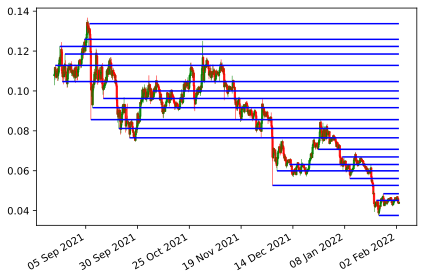

In [130]:
plot_all()